In [1]:
# 선형회귀 : 회귀
# 로지스틱 회귀 : 분류!!!!!!!!! 주의

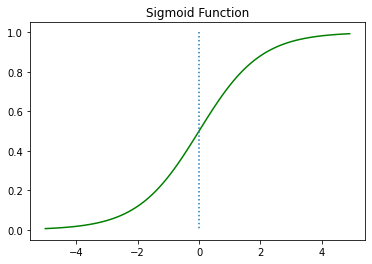

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1, 0], ':')
plt.title('Sigmoid Function')
plt.show()

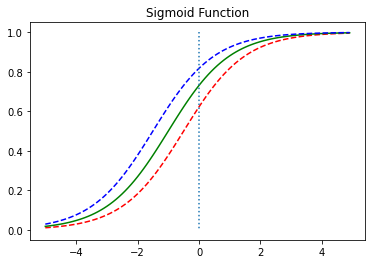

In [3]:
x = np.arange(-5, 5, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [4]:
# 로지스틱 회귀의 비용 함수 : 로그 함수를 이용함, H(x)를 가설이라고 했을 때
# y=1인 경우, -log(H(x))
# y=0인 경우, -log(1-H(x))
# 두 경우를 모두 고려하면 -(y*log(H(x)) + (1-y)*log(1-H(x)))

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

In [2]:
torch.manual_seed(1)

In [3]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [4]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [6]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
hypo = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
cost = (-( y_train * torch.log(hypo) + (1-y_train) * torch.log(1-hypo))).mean()

In [8]:
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):

    hypo = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
    cost = (-( y_train * torch.log(hypo) + (1-y_train) * torch.log(1-hypo))).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [11]:
print(torch.sigmoid(x_train.matmul(W)+b))
print(y_train)
print(1 / (1 + torch.exp(-(x_train.matmul(W) + b))))

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<MulBackward0>)


In [10]:
prediction = hypo >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
